In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


Install required Library

In [2]:
!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 36.3/112.6 GB disk)


Import required modules

In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

Mount Google Drrive

In [5]:
import torch

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Check using CPU/GPU

In [6]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("device = ", device)

device =  cuda


Defining Dataset

In [7]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="fvJnM0jWjkfWUra7cjCS")
project = rf.workspace("cos30049-ctip").project("detect-species")
version = project.version(10)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.103, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Detect-Species-10 in yolov8:: 100%|██████████| 6824/6824 [00:03<00:00, 2054.03it/s]


In [ ]:
import yaml

with open(f"{dataset.location}/data.yaml", 'r') as f:
    dataset_yaml = yaml.safe_load(f)
dataset_yaml["train"] = "../train/images"
dataset_yaml["val"] = "../valid/images"
dataset_yaml["test"] = "../test/images"
with open(f"{dataset.location}/data.yaml", 'w') as f:
    yaml.dump(dataset_yaml, f)

Model Training

In [10]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 223MB/s]
New https://pypi.org/project/ultralytics/8.3.10 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Detect-Species-10/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, class

In [11]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1728721354.a5ffd2bfb850.3118.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2625.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch2626.jpg  weights
P_curve.png					    train_batch2627.jpg
PR_curve.png					    train_batch2.jpg


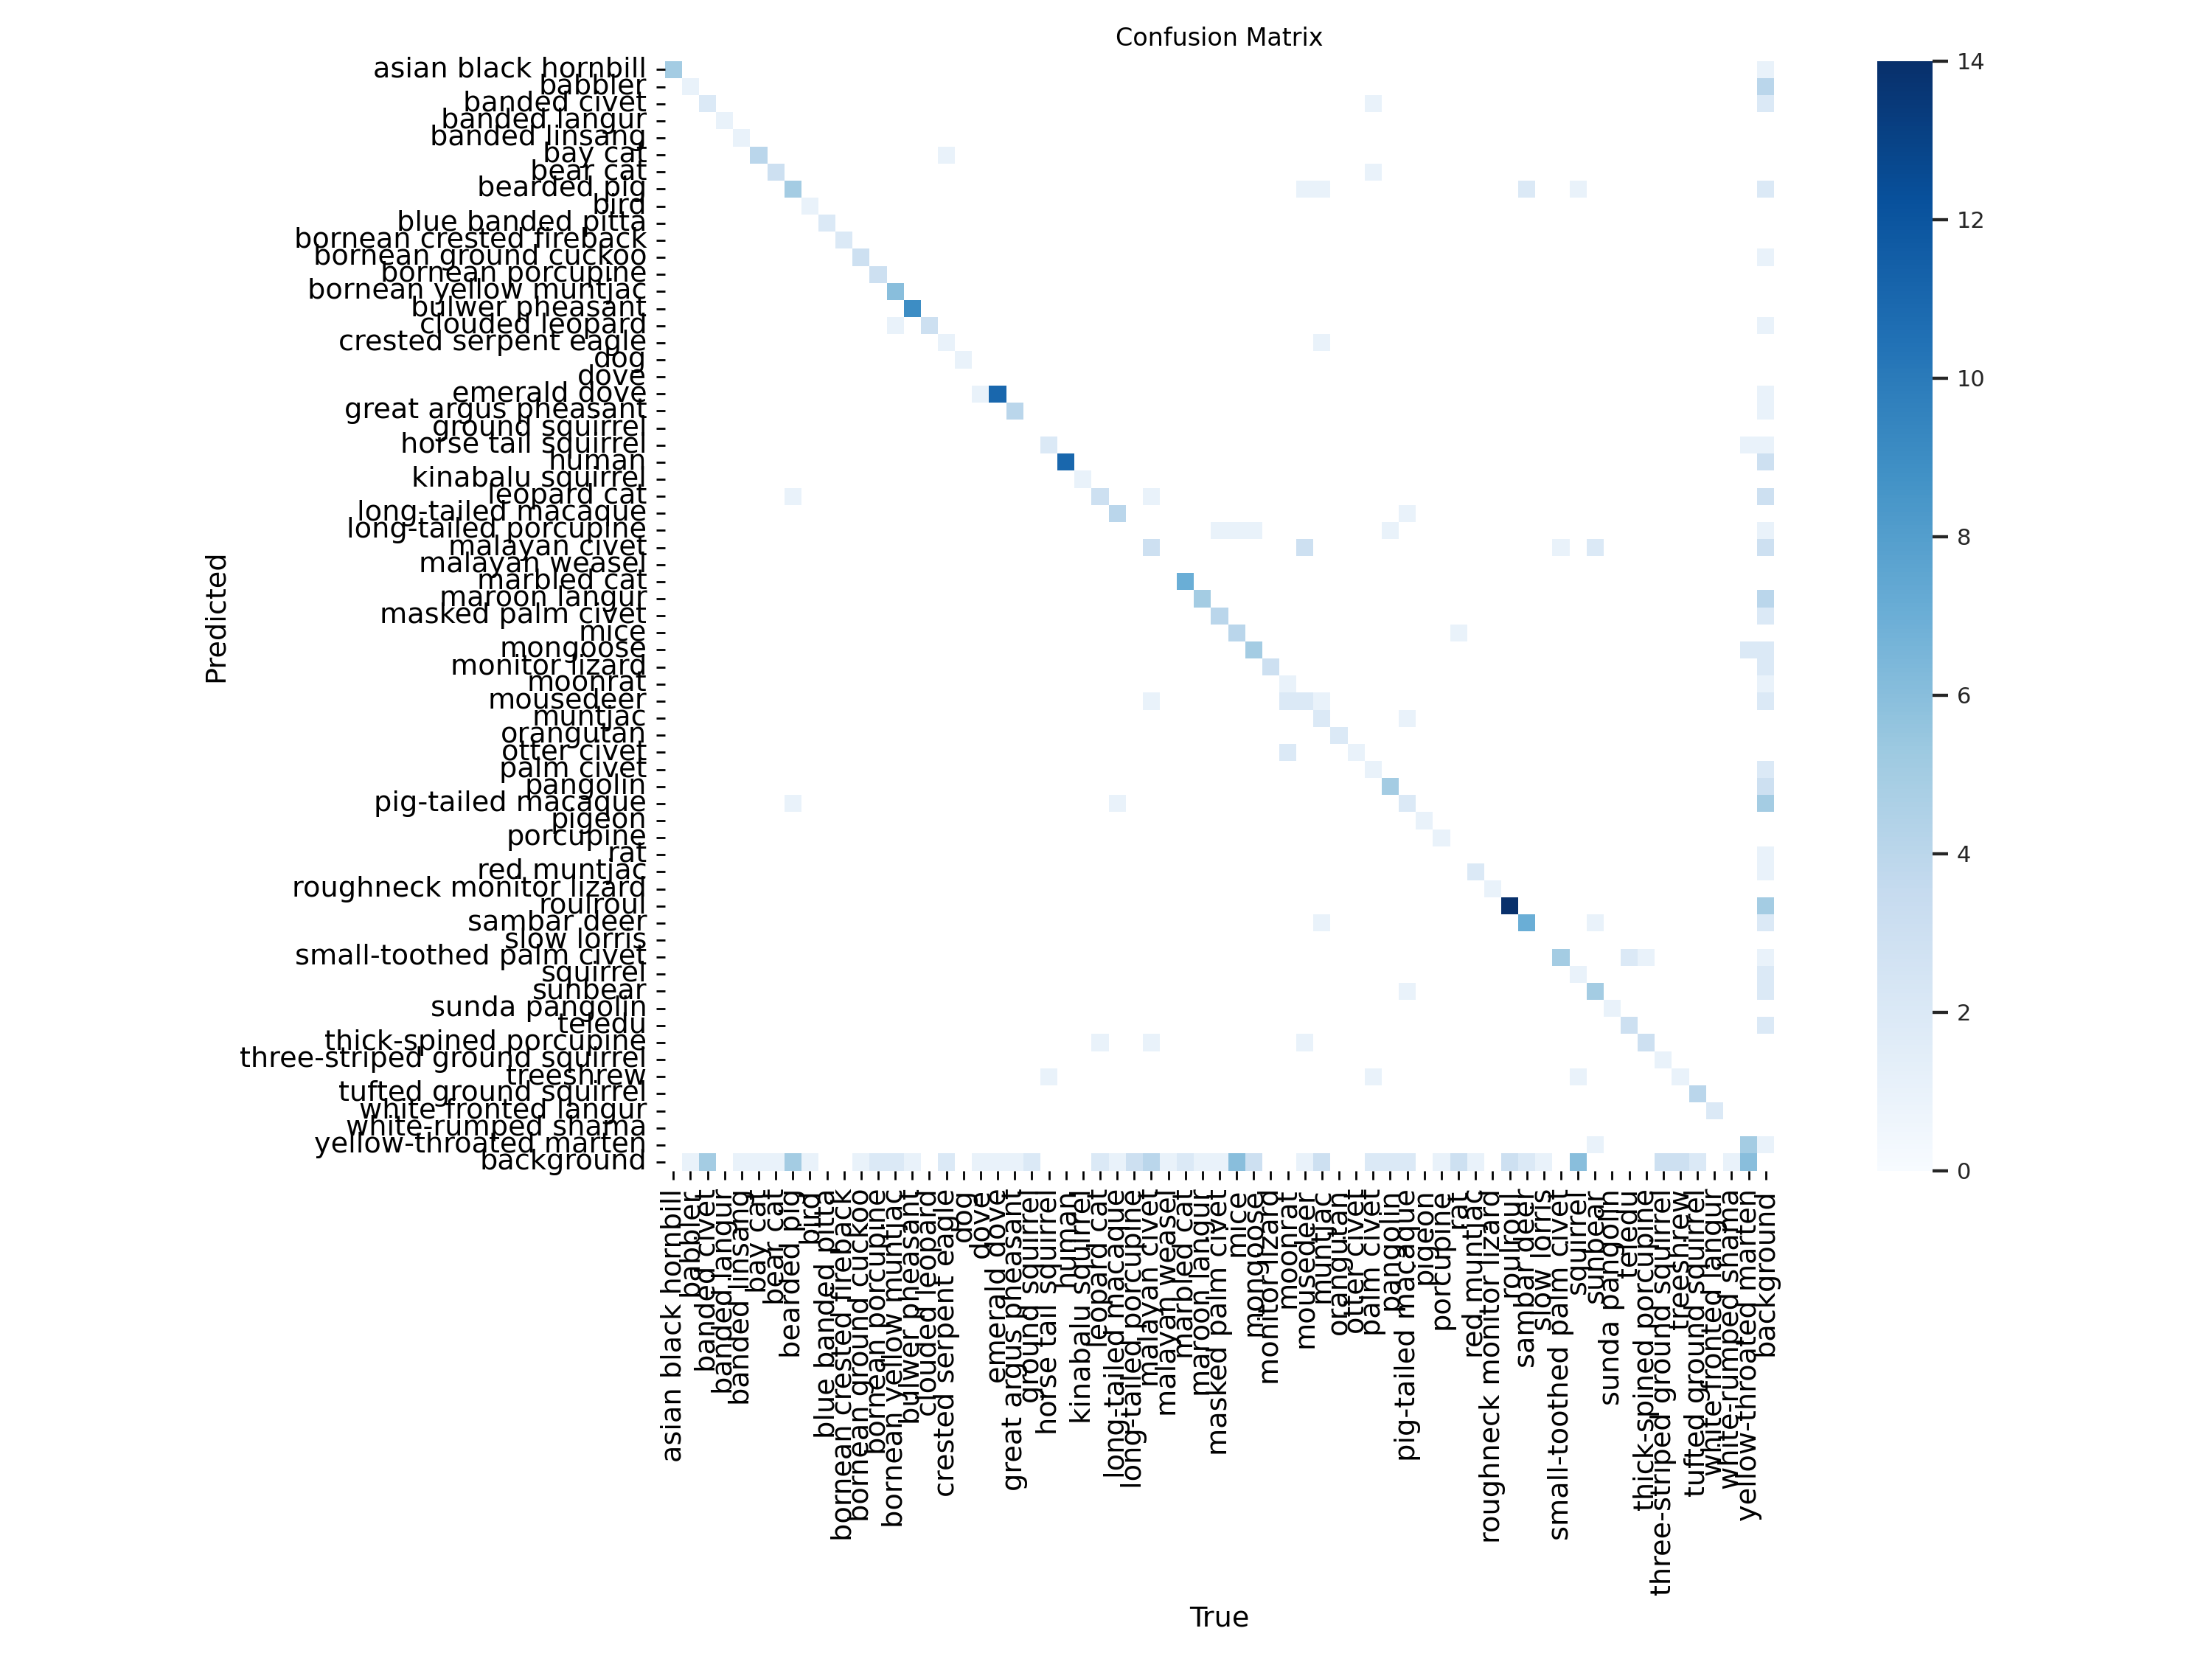

In [12]:
Image(filename='/content/runs/detect/train/confusion_matrix.png', width=600)

/content


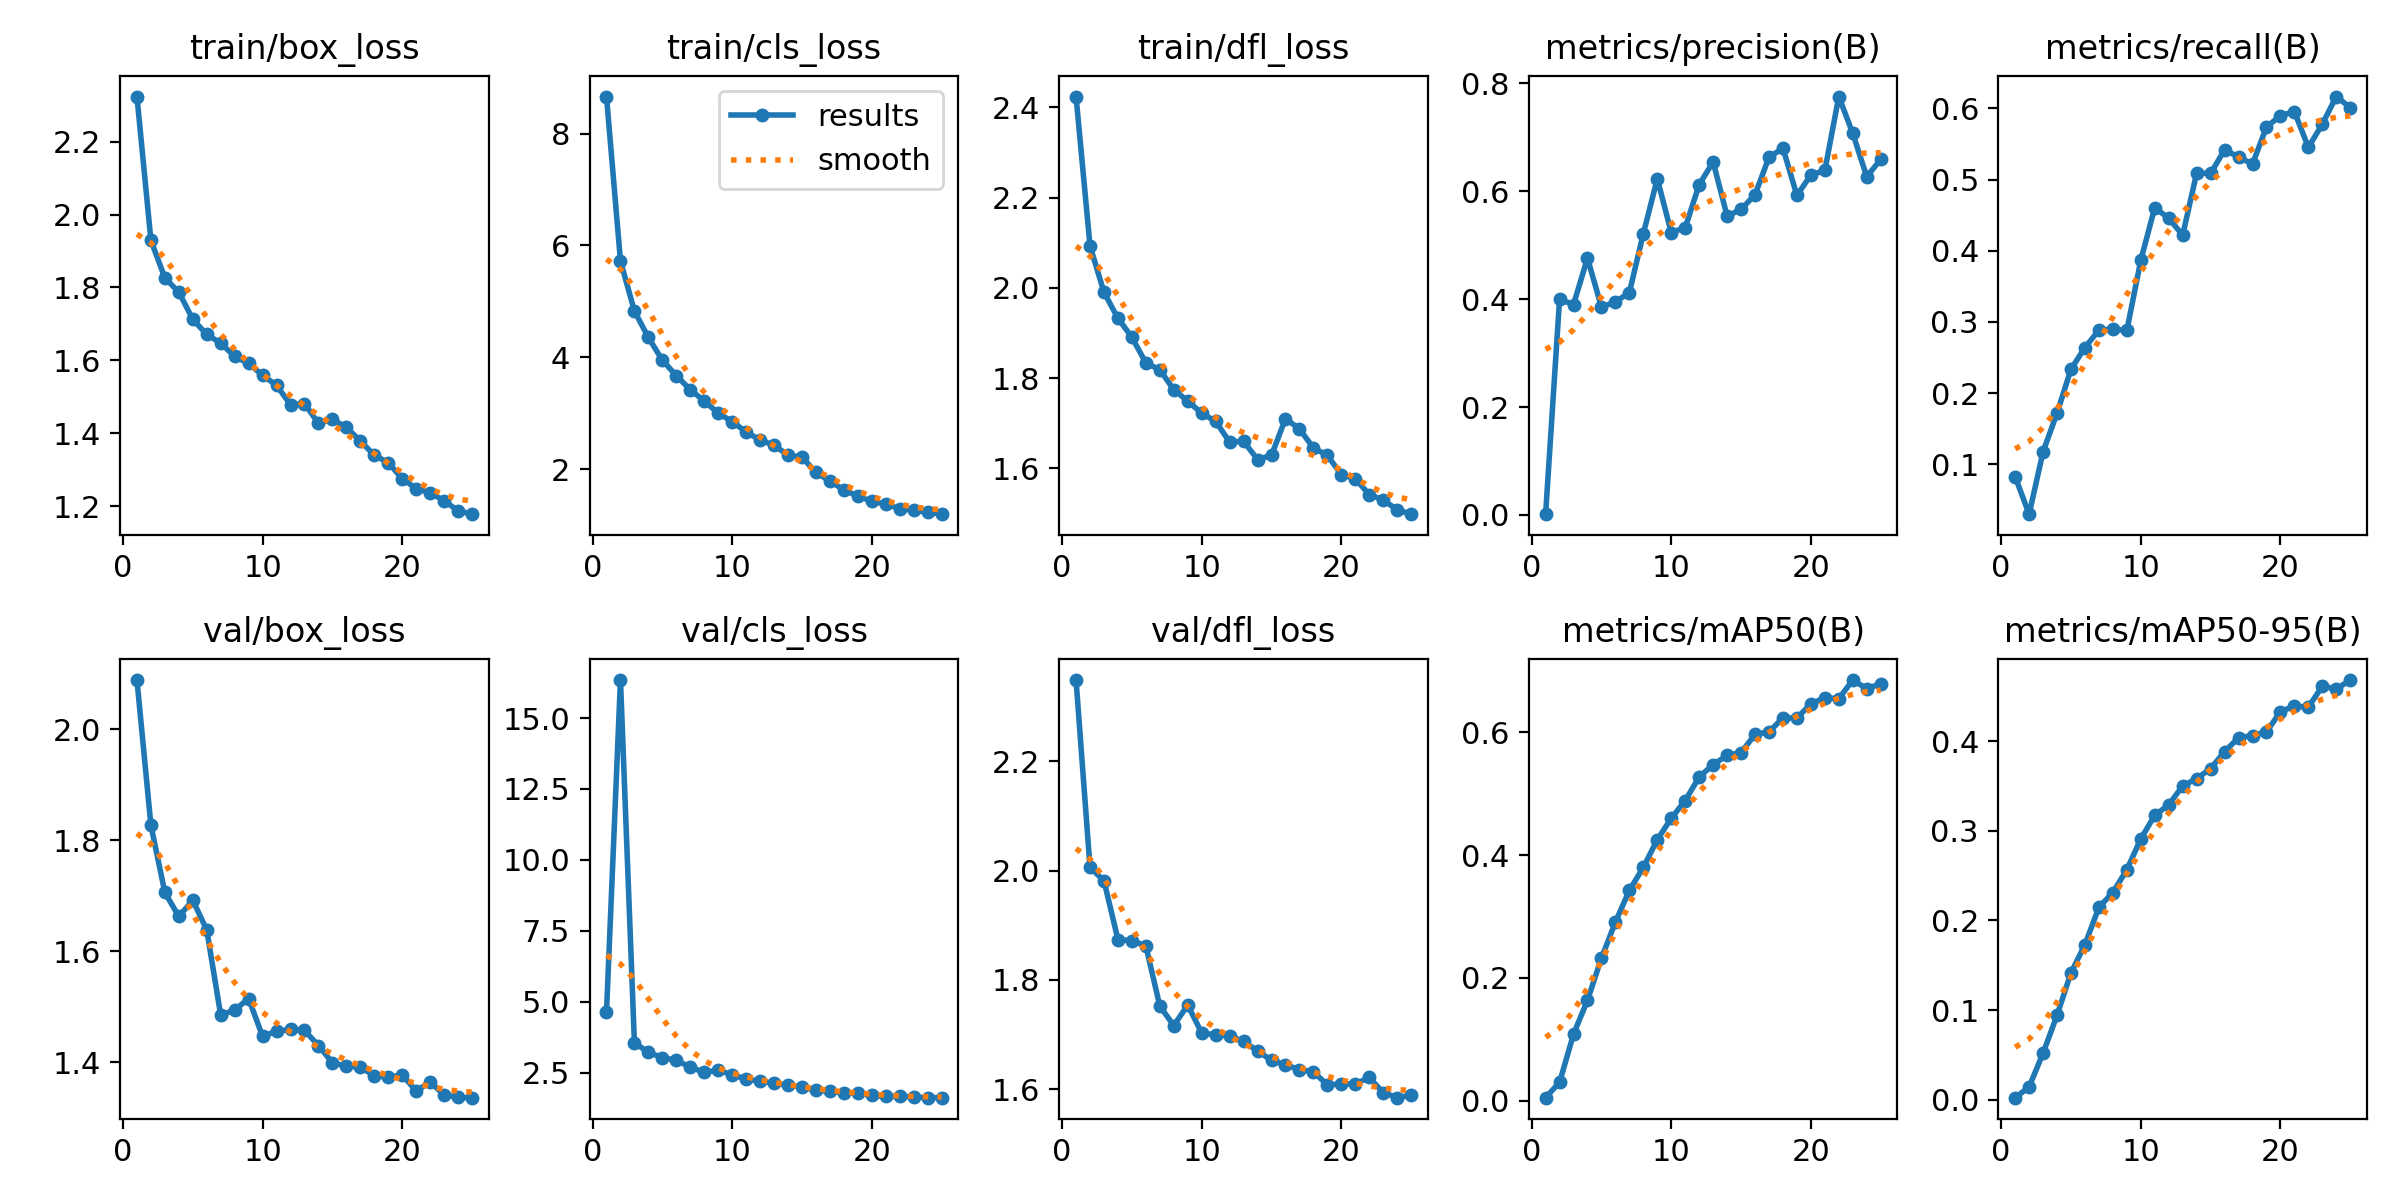

In [13]:
%cd {HOME}
Image(filename=f'/content/runs/detect/train/results.png', width=600)

/content


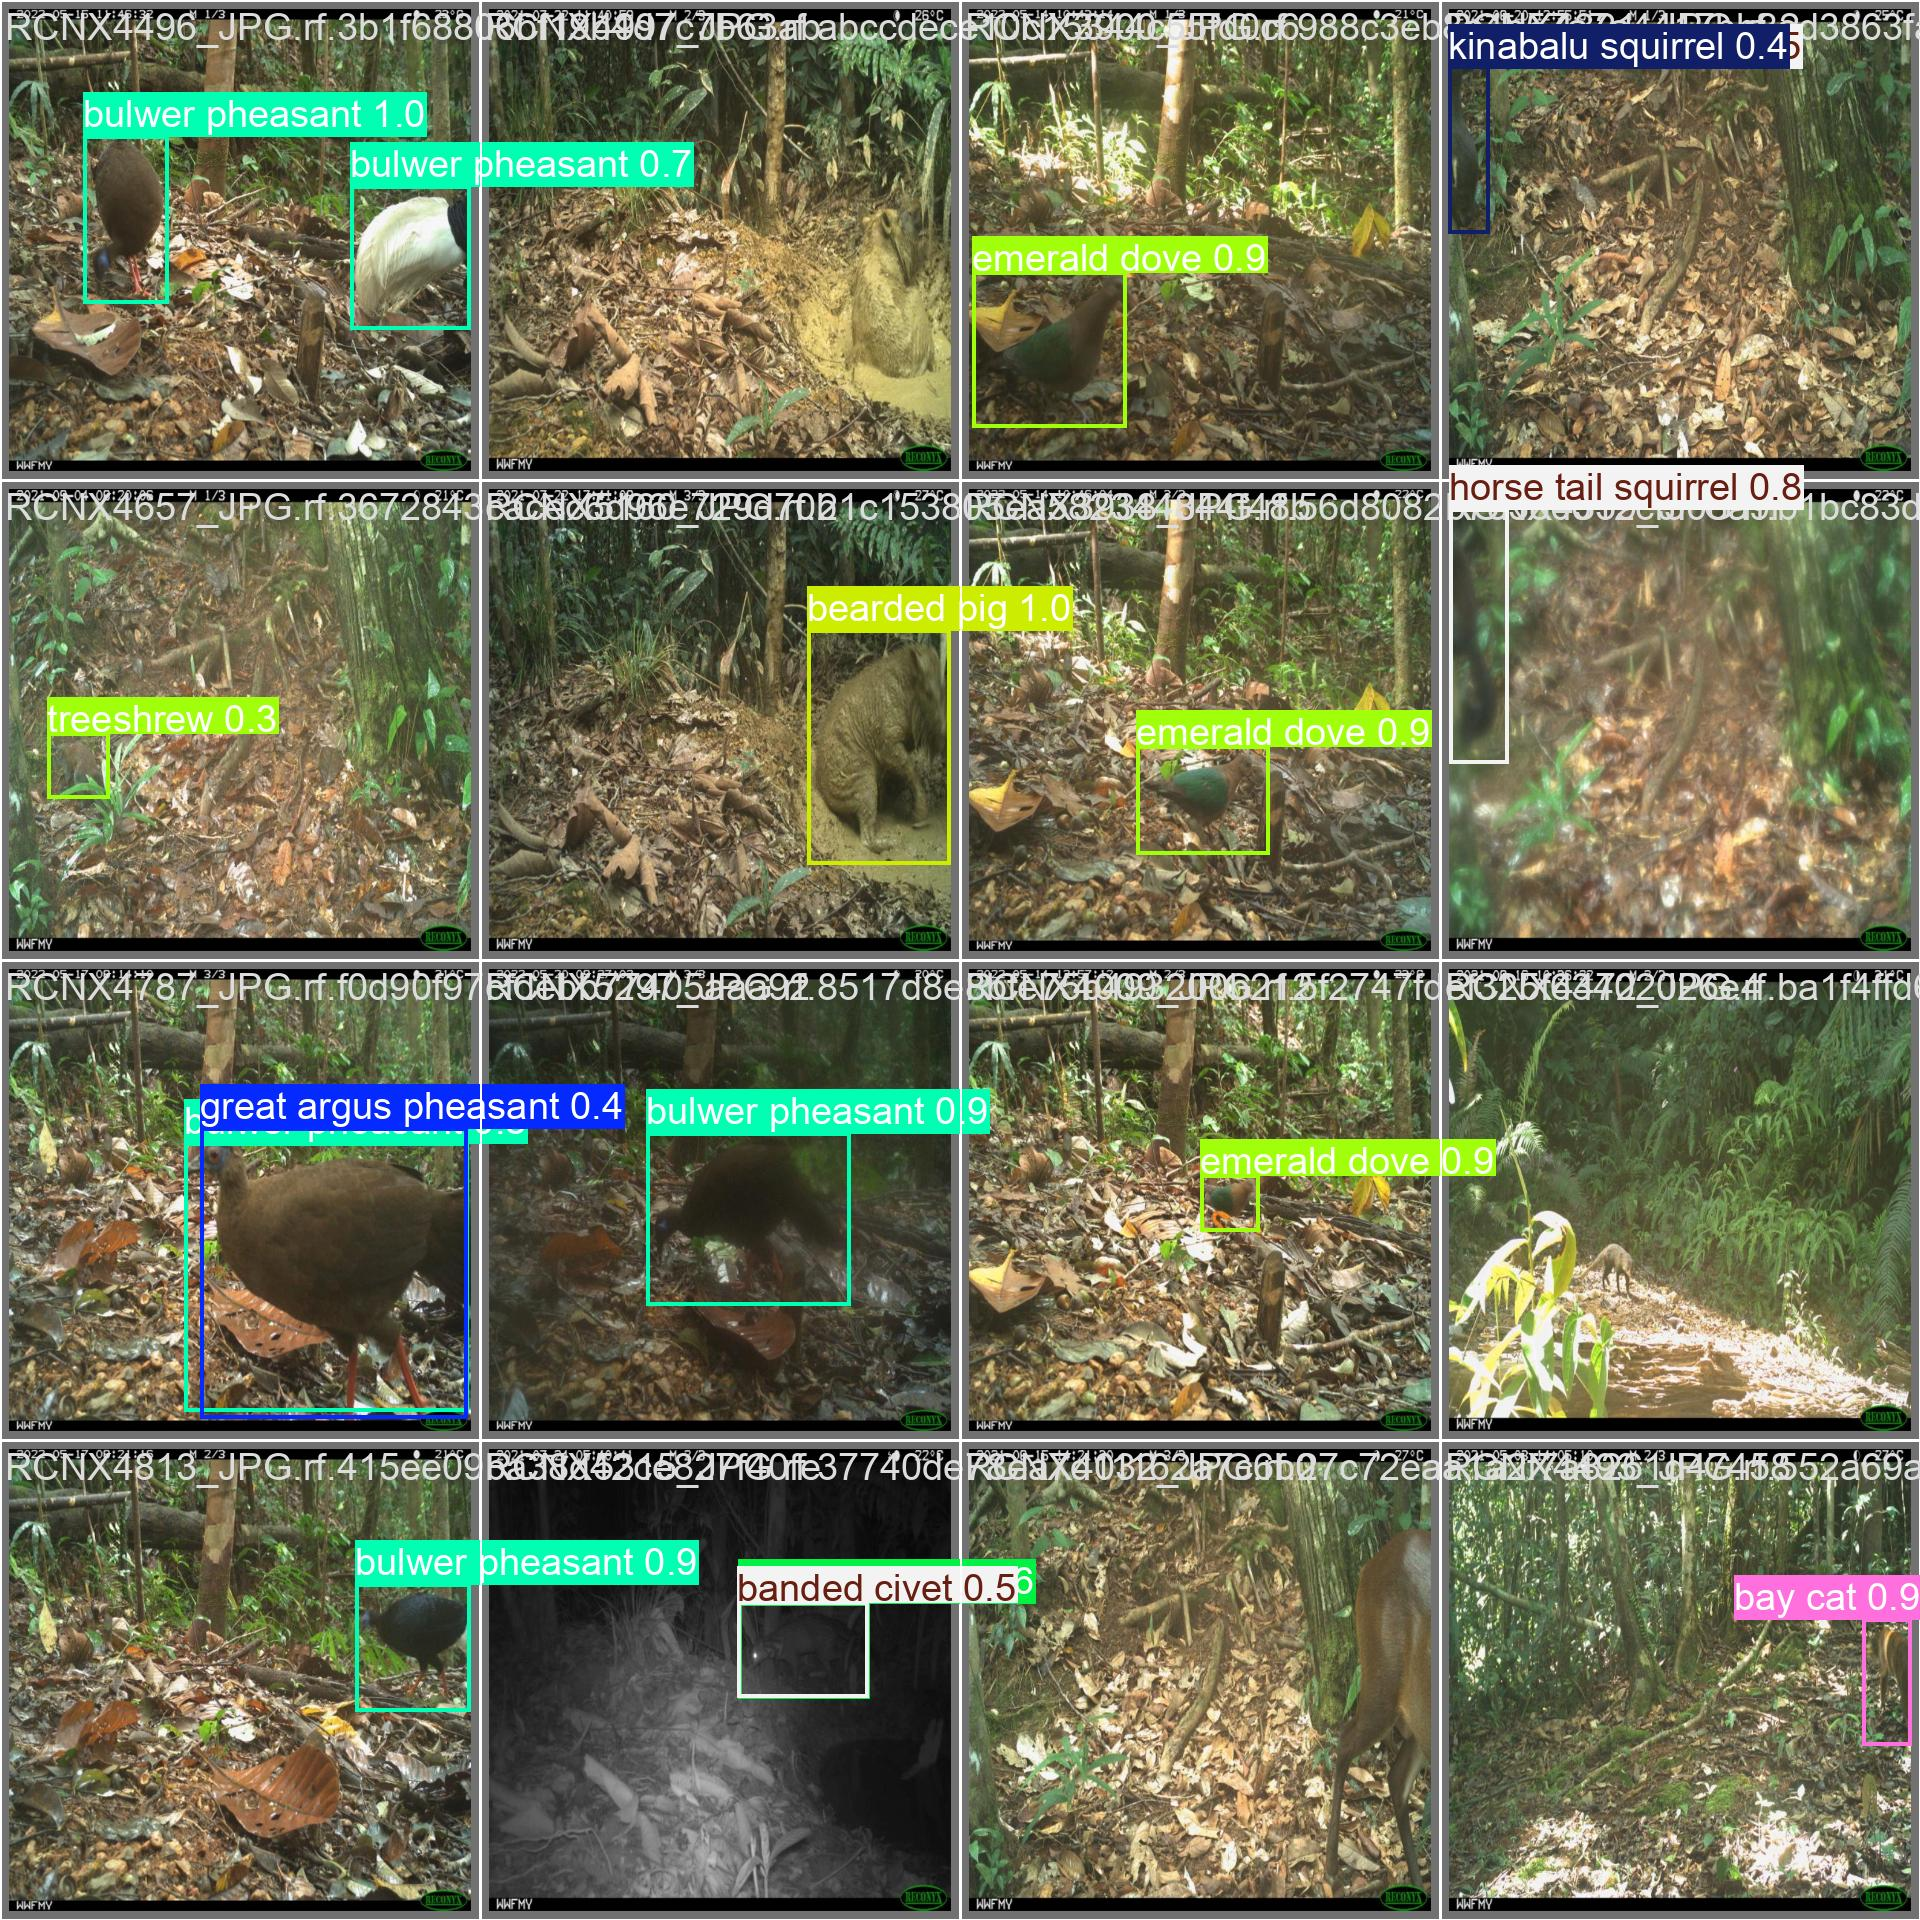

In [14]:
%cd {HOME}
Image(filename=f'/content/runs/detect/train/val_batch0_pred.jpg', width=600)

Model Evaluation

In [ ]:
%cd {HOME}
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,169,680 parameters, 0 gradients, 29.7 GFLOPs
val: Scanning /content/Detect-Species-10/valid/labels.cache... 310 images, 0 backgrounds, 0 corrupt: 100% 310/310 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 20/20 [00:07<00:00,  2.53it/s]
                   all        310        337       0.66      0.601       0.68      0.469
  asian black hornbill          5          5      0.851          1      0.995      0.565
               babbler          1          2      0.282        0.5      0.496      0.298
          banded civet          7          7      0.361      0.286      0.422      0.344
         banded langur          1          1      0.602          1      0.995      0.895
        banded linsang          2          2      0.701        0.5       0.62      0.325
               bay cat       

Inference with Model

In [16]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True project=/content/runs/detect/predict_results

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,169,680 parameters, 0 gradients, 29.7 GFLOPs

image 1/310 /content/Detect-Species-10/test/images/IMG_0018_JPG.rf.2e61d950db8f21f3462b051a61cece0f.jpg: 800x800 (no detections), 24.2ms
image 2/310 /content/Detect-Species-10/test/images/IMG_0020_JPG.rf.93464c1adceb6b870374711f10946b35.jpg: 800x800 1 bornean porcupine, 24.2ms
image 3/310 /content/Detect-Species-10/test/images/IMG_0023_JPG.rf.1df83e303b998d4d7af51b2d07b4b21b.jpg: 800x800 (no detections), 24.6ms
image 4/310 /content/Detect-Species-10/test/images/IMG_0024_JPG.rf.427cb1479f659913b1f7e28b382909cd.jpg: 800x800 2 bornean yellow muntjacs, 24.1ms
image 5/310 /content/Detect-Species-10/test/images/IMG_0032-2-_JPG.rf.134a96b3553a2f0c9333fbbf3bc05240.jpg: 800x800 1 clouded leopard, 24.2ms
image 6/310 /content/Detect-Species-10/test/images/IMG_0045-2-_JPG.rf.d7188d4216026f32d69dee5a6a2a111b.jpg: 800x800 1 sunda 

In [17]:
!ls -l /content/runs/detect/

total 12
drwxr-xr-x 3 root root 4096 Oct 12 09:06 predict_results
drwxr-xr-x 3 root root 4096 Oct 12 09:05 train
drwxr-xr-x 2 root root 4096 Oct 12 09:06 val


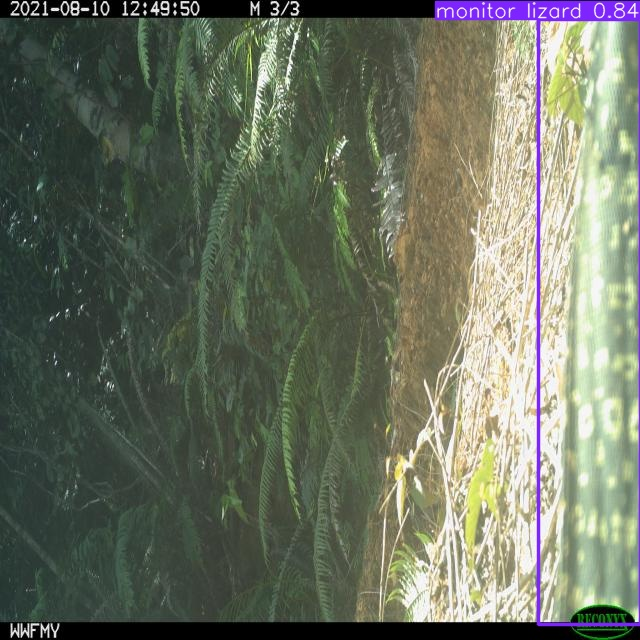

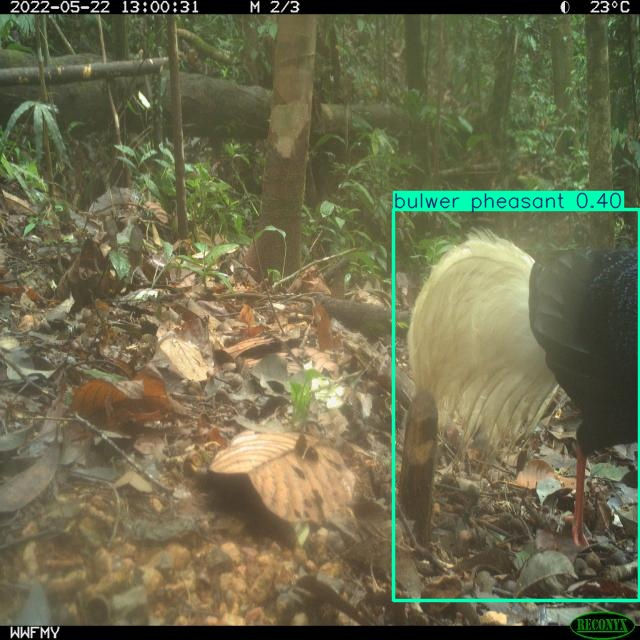

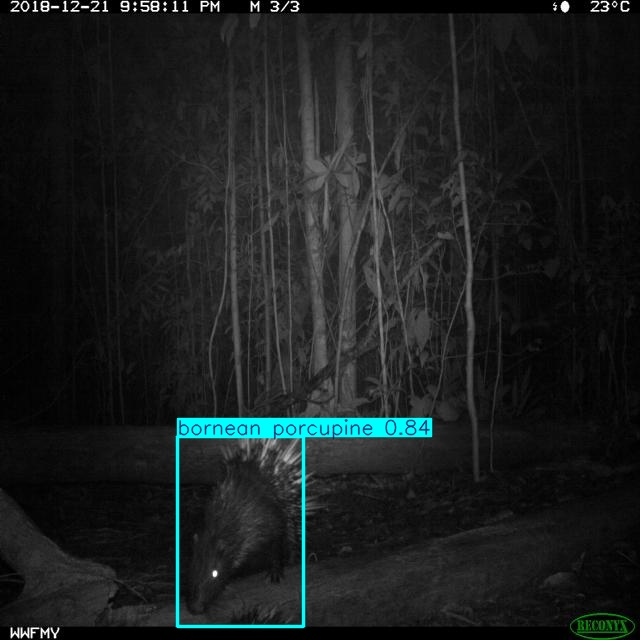

In [18]:
import os
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/predict_results'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
if subfolders:  # Check if there are any 'predict' subfolders
    latest_folder = max(subfolders, key=os.path.getmtime)

    # Find all .jpg images in the latest folder
    image_paths = glob.glob(f'{latest_folder}/*.jpg')

    # Check if there are any images found
    if image_paths:
        # Display the first three images
        for image_path in image_paths[:3]:
            display(Image(filename=image_path, width=600))
            print("\n")
    else:
        print("No JPG images found in the latest folder.")
else:
    print("No 'predict' folders found.")


Save Model

In [19]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"/content/runs/detect/train/")

Dependency ultralytics==8.0.196 is required but found version=8.2.103, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
View the status of your deployment at: https://app.roboflow.com/cos30049-ctip/detect-species/10
Share your model with the world at: https://universe.roboflow.com/cos30049-ctip/detect-species/model/10


In [21]:
!cp /content/runs/detect/train/weights/best.pt /content/drive/MyDrive/Colab Notebooks/COS30049_CTIP_Assignment/Species_Detection_Model/best.pt

cp: target 'Notebooks/COS30049_CTIP_Assignment/Species_Detection_Model/best.pt' is not a directory
